### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder ,StandardScaler
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#loading the data
data=pd.read_csv("train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 1)  Initial Exploration

In [3]:
#Gives first 5 rows data from the dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Gives first 2 rows data from the dataset
data.head(2)  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [5]:
#Gives last 5 rows data from the dataset
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
#Gives overview of the dataset's dimensions and data types.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [7]:
# Gives numeric Columns
print(data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [8]:
#Fetches the data of Item_Identifier
data.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [9]:
#Fetches the data in first row
data.iloc[0]

Item_Identifier                          FDA15
Item_Weight                                9.3
Item_Fat_Content                       Low Fat
Item_Visibility                       0.016047
Item_Type                                Dairy
Item_MRP                              249.8092
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     3735.138
Name: 0, dtype: object

In [10]:
#Gives the Count for rows and Column 
data.shape

(8523, 12)

In [11]:
#finding the Missing Values(Null Values) 
datawith_missing = data.isnull().sum()
print(datawith_missing)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [12]:
# Fetches the types of Columns
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
# Returns all the Columns in the dataset
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

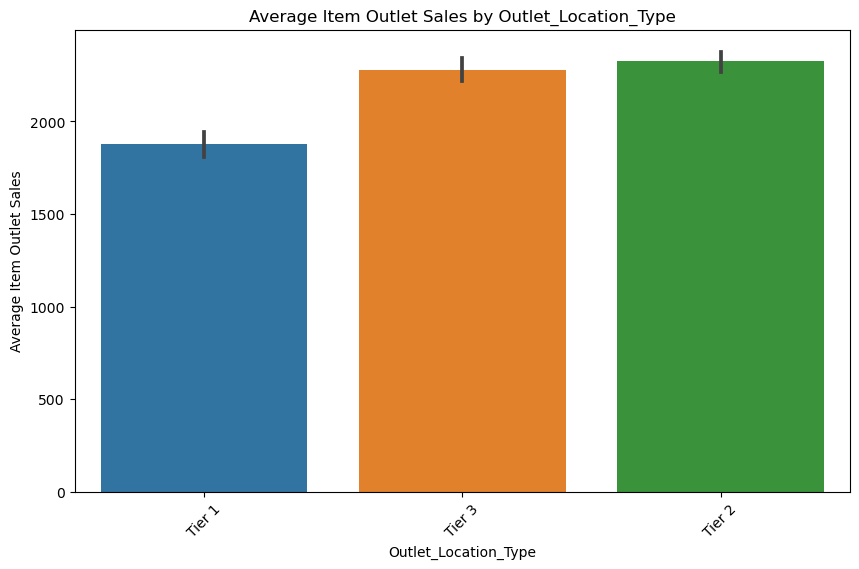

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Outlet_Location_Type', y='Item_Outlet_Sales', estimator=np.mean)
plt.title('Average Item Outlet Sales by Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

## 2) Exploratory Data Analysis

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 2.1 Distribution of Sales by Item Type using Bar Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Starchy Foods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

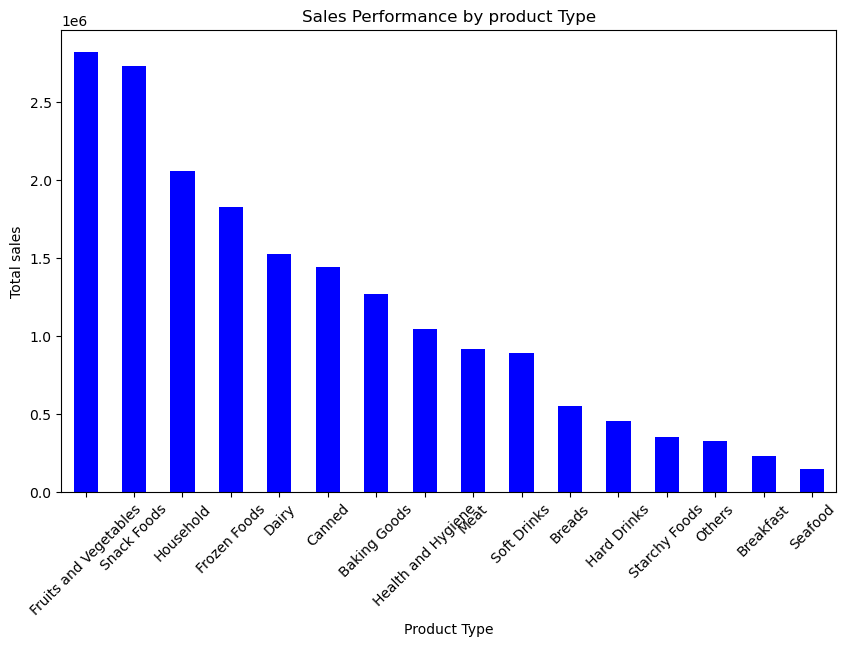

In [16]:
product_sales=data.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)
#create a bar plot to visualize the sales performance of diff product types
plt.figure(figsize=(10,6))
product_sales.plot(kind="bar",color="blue")
plt.title("Sales Performance by product Type")
plt.xlabel("Product Type")
plt.ylabel("Total sales")
plt.xticks(rotation=45)

The Outlet with the highest Sales in the dataset is *Fruits and Vegitables*

### 2.2.Sales Performance by Outlet Establishment Year using Line graph

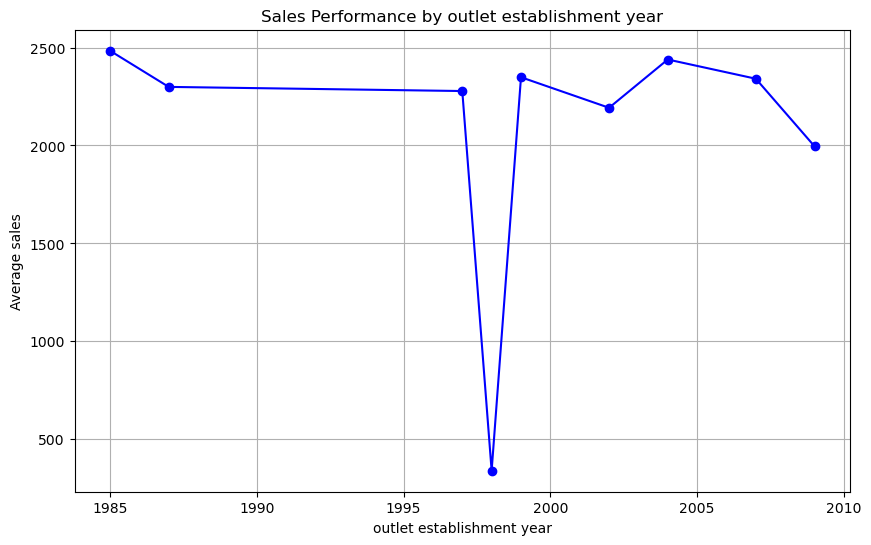

In [17]:
sales_by_yr=data.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().sort_index()

#create a line plot to visualize the sales performance by outlet establishment year
plt.figure(figsize=(10,6))
sales_by_yr.plot(marker='o', color='b')

#labeling the graph
plt.title("Sales Performance by outlet establishment year")
plt.xlabel("outlet establishment year")
plt.ylabel("Average sales")
plt.grid()

The Year 1985 has the highest sales in dataset

### 2.3. Sales Distribution Across Outlet Types using Box plot

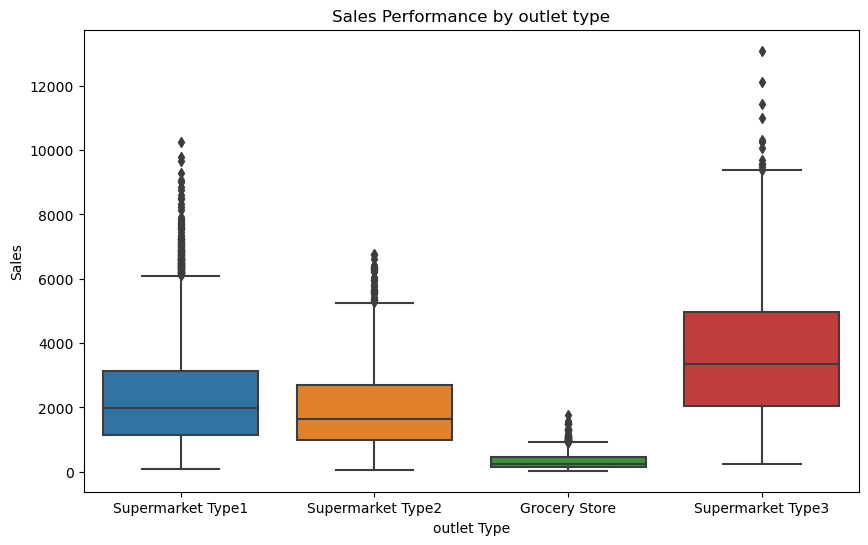

In [18]:
plt.figure(figsize=(10,6))

# Create a box plot
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

#labeling the graph
plt.title("Sales Performance by outlet type")
plt.xlabel("outlet Type")
plt.ylabel("Sales")
plt.show()

Supermarket type 3 generates the most sales overall , followed by supermarket type 1, Grocery store consistently have the lowest sales.

### 2.4.Effect of Outlet Size on Sales using Bar plot

(array([0, 1, 2]),
 [Text(0, 0, 'Small'), Text(1, 0, 'High'), Text(2, 0, 'Medium')])

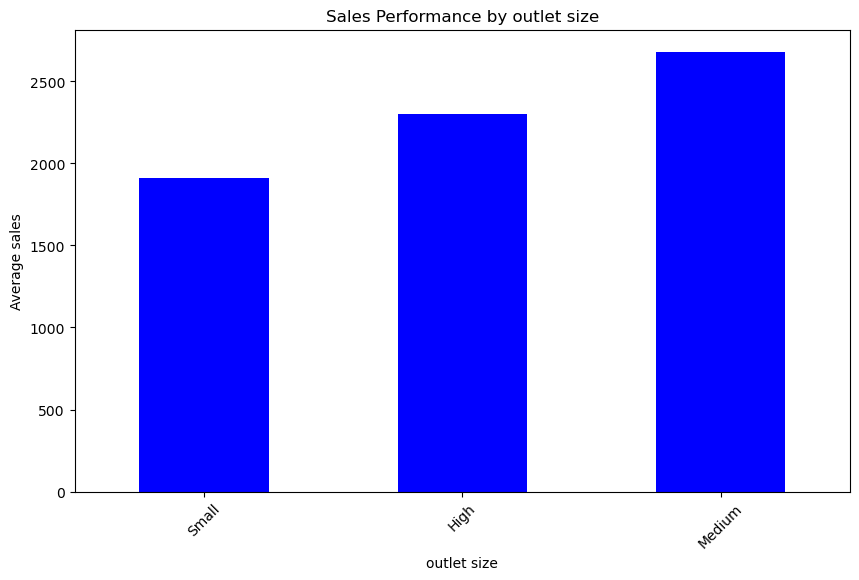

In [19]:
sales_by_size=data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values()

#create a bar plot to visualize the sales performance by outlet size
plt.figure(figsize=(10,6))
sales_by_size.plot(kind="bar",color="blue")

#labeling the graph
plt.title("Sales Performance by outlet size")
plt.xlabel("outlet size")
plt.ylabel("Average sales")
plt.xticks(rotation=45)

Medium-sized outlets perform the best, Small outlets generate the lowest sales, High-sized outlets fall in between 

### 2.5.Relationship b\w item MRP and Sales by Scatter Plot

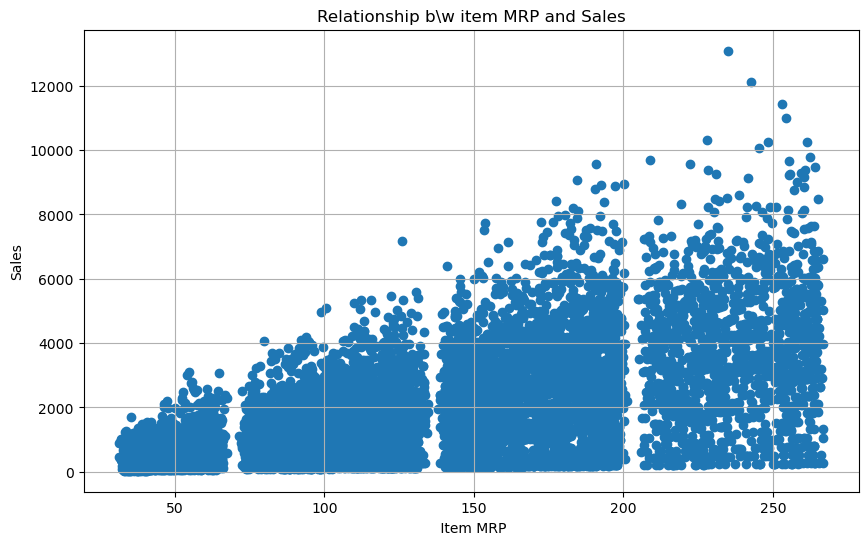

In [20]:
#create a scatter plot to visualize the sales performance by item_MRP
plt.figure(figsize=(10,6))
plt.scatter(data.Item_MRP,data.Item_Outlet_Sales)

#labeling the graph
plt.title("Relationship b\w item MRP and Sales")
plt.xlabel(" Item MRP")
plt.ylabel("Sales")
plt.grid()

Higher-priced items generally lead to higher sales, but there are still several lower-priced products with good sales performance.

### 2.6.Sales Distribution Across Outlet Location Type using Box plot

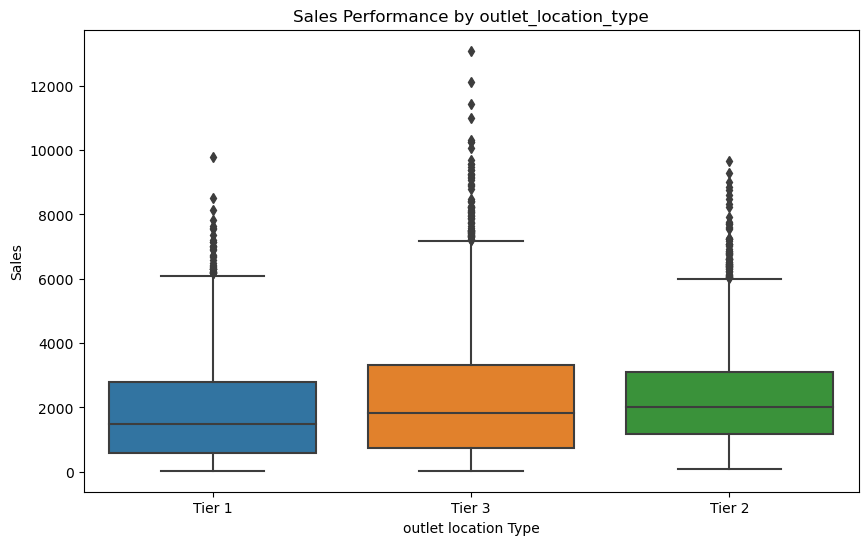

In [21]:
#create a box plot to visualize the sales performance by outlet location Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

#labeling the graph
plt.title("Sales Performance by outlet_location_type")
plt.xlabel("outlet location Type")
plt.ylabel("Sales")
plt.show()

Tier 3 typed outlet location perform the best, Tier 1 and Tier 2 typed outlet location perform the same.

### 2.7.Histograms for Numerical Variables

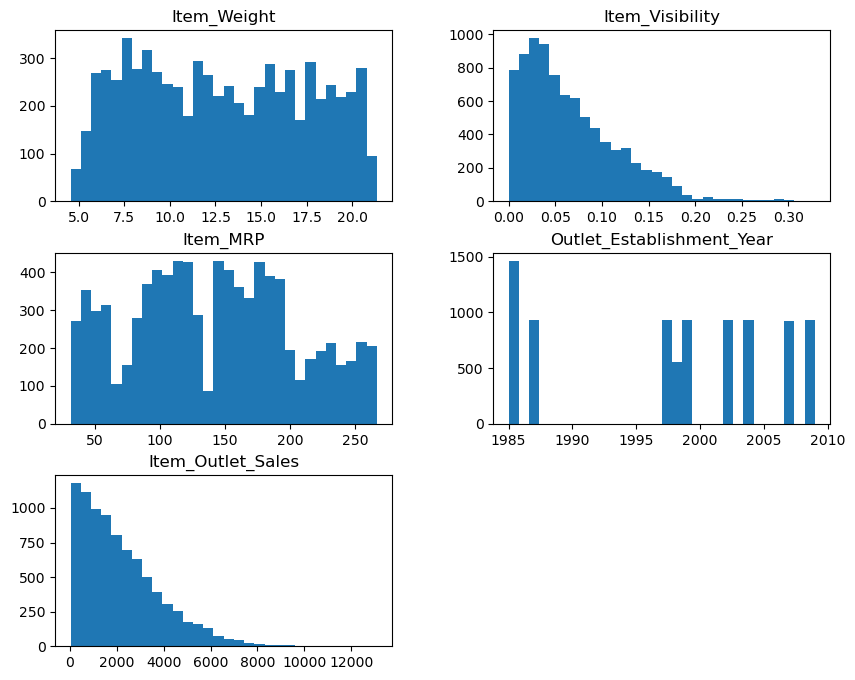

In [22]:
# Histograms for Numerical Variables:
data.hist(figsize=(10, 8), bins=30, grid=False)
plt.show()

## 3) Preprocessing for Modeling

### 3.1 Imputation Of Missing Data

In [23]:
#Check if there are still missing values in the data
missing_data = data.isnull().sum()

In [24]:
print(missing_data)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [25]:
#finding the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [26]:
#Filling missing Item_Weight values by grouping by Item_Type and using the median 
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))

In [27]:
#Filling missing Outlet_Size values by grouping by Item_Type and using the mode 
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Item_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [28]:
# Fix inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [29]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [30]:
#Check if there are still missing values in the data
data_without = data.isnull().sum()

In [31]:
print(data_without)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###  3.2. Categorical Variable Encoding
#### 3.2.1  Identify Nominal , Numeric and Ordinal Data

In [33]:
# Assuming nominal and ordinal data columns
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']  # Categorical without order
ordinal_cols = ['Outlet_Size']  # Categorical with order, e.g., Small < Medium < High
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales', 'Outlet_Establishment_Year']  # Numerical columns

# Display identified nominal and ordinal and numerical columns
print("\nNominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)
print("Numerical Columns:", numerical_columns)


Nominal Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns: ['Outlet_Size']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


#### 3.2.2 Encoding Techniques

In [34]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Convert Item_Identifier and Outlet_Identifier to numeric using Label Encoding
data['Item_Identifier'] = label_encoder.fit_transform(data['Item_Identifier'])
data['Outlet_Identifier'] = label_encoder.fit_transform(data['Outlet_Identifier'])

# Display transformed columns
data[['Item_Identifier', 'Outlet_Identifier']].head()

,Item_Identifier,Outlet_Identifier
0,156,9
1,8,3
2,662,9
3,1121,0
4,1297,1


In [35]:
#finding the unique values for Outlet_Size
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [36]:
#defining mappings for Outlet_Size
map_Outlet_Size=['Medium', 'High', 'Small']

In [37]:
#applying Encoding Techniques for Columns
ohe=OneHotEncoder(sparse_output=False)      #Nominal Encoding
ode=OrdinalEncoder(categories=[map_Outlet_Size])  #Ordinal Encoding 

#### 3.2.3 ColumnTransformering

In [38]:
# Define the ColumnTransformer with correct transformers
ct = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical columns
        ('ohe', OneHotEncoder(sparse_output=False), 
         [ 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),
        
        # Apply OrdinalEncoder to ordinal categorical columns
        ('ode', OrdinalEncoder(), ['Outlet_Size']),
    ],
   remainder='passthrough'  # Keep any other columns as they are
)
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ode', OrdinalEncoder(), ['Outlet_Size'])])

In [39]:
# applying the transformation
df_encoded = ct.fit_transform(data)
df_encoded.head()

,ohe__Item_Fat_Content_Low Fat,ohe__Item_Fat_Content_Regular,ohe__Item_Type_Baking Goods,ohe__Item_Type_Breads,ohe__Item_Type_Breakfast,ohe__Item_Type_Canned,ohe__Item_Type_Dairy,ohe__Item_Type_Frozen Foods,ohe__Item_Type_Fruits and Vegetables,ohe__Item_Type_Hard Drinks,...,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3,ode__Outlet_Size,remainder__Item_Identifier,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Identifier,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


In [40]:
# Renaming columns
new_column_names = {'remainder__Item_Identifier':'Item_Identifier' ,
       'ohe__Item_Fat_Content_Low Fat':'Item_Fat_Content_Low Fat',
       'ohe__Item_Fat_Content_Regular':'Item_Fat_Content_Regular',
       'remainder__Outlet_Identifier':'Outlet_Identifier',
       'ohe__Item_Type_Baking Goods':'Item_Type_Baking Goods', 
       'ohe__Item_Type_Breads':'Item_Type_Breads',
       'ohe__Item_Type_Breakfast':'Item_Type_Breakfast', 
       'ohe__Item_Type_Canned':'Item_Type_Canned',
       'ohe__Item_Type_Dairy':'Item_Type_Dairy',
       'ohe__Item_Type_Frozen Foods':'Item_Type_Frozen Foods',
       'ohe__Item_Type_Fruits and Vegetables':'Item_Type_Fruits and Vegetables',
        'ohe__Item_Type_Hard Drinks':'Item_Type_Hard Drinks',
       'ohe__Item_Type_Health and Hygiene':'Item_Type_Health and Hygiene', 
        'ohe__Item_Type_Household':'Item_Type_Househol',
       'ohe__Item_Type_Meat':'Item_Type_Meat', 
        'ohe__Item_Type_Others':'Item_Type_Others',
       'ohe__Item_Type_Seafood':'Item_Type_Seafood',
        'ohe__Item_Type_Snack Foods':'Item_Type_Snack Foods',
       'ohe__Item_Type_Soft Drinks':'Item_Type_Soft Drink',
       'ohe__Item_Type_Starchy Foods' :'Item_Type_Starchy Foods',
       'ohe__Outlet_Location_Type_Tier 1':'Outlet_Location_Type_Tier 1',
        'ohe__Outlet_Location_Type_Tier 2':'Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3':'Outlet_Location_Type_Tier 3', 
        'ohe__Outlet_Type_Grocery Store':'Outlet_Type_Grocery Store',
       'ohe__Outlet_Type_Supermarket Type1':'Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2':'Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3':'Outlet_Type_Supermarket Type3', 
       'ode__Outlet_Size':'Outlet_Size',
       'remainder__Item_Weight': 'Item_Weight',
       'remainder__Item_Visibility':'Item_Visibility',
       'remainder__Item_Outlet_Sales':'Item_Outlet_Sales',
       'remainder__Item_MRP':'Item_MRP',
       'remainder__Outlet_Establishment_Year':'Outlet_Establishment_Year' ,
       }
# Apply the renaming
df_encoded.rename(columns=new_column_names, inplace=True)

df_encoded.head(5)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


### 3.3 Feature Derivation

In [41]:
# Creating a new column named Outlet_age for the store's age
df_encoded['Outlet_age'] = 2024 - df_encoded['Outlet_Establishment_Year']

# Display the original columns and the new feature
print(df_encoded[['Outlet_Establishment_Year', 'Outlet_age']].head())

   Outlet_Establishment_Year  Outlet_age
0                       1999          25
1                       2009          15
2                       1999          25
3                       1998          26
4                       1987          37


In [42]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380,25
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228,15
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700,25
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800,26
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052,37


### 3.4  Outlier Treatment

In [43]:
# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5 

# Dictionary to store detected outliers
outliers_dict = {}

# Calculating Z-scores and identifing the outliers
for col in continuous_columns:
    df_encoded[col + '_zsr'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculating Z-score with its formula
    outliers_dict[col] = df_encoded[df_encoded[col + '_zsr'] > z_threshold]  # Storing outliers
    print(f"\n{col}: {outliers_dict[col].shape[0]} outliers detected.")
    
     # Apply capping to outliers
    capped_values = df_encoded[col].copy()
    capped_values[df_encoded[col + '_zsr'] > z_threshold] = df_encoded[col].mean() + z_threshold * df_encoded[col].std()  # Capping at the Z-score threshold
    
    # Replace original column with capped values
    df_encoded[col] = capped_values
    print(f"{col}: Capping applied to outliers.")



Item_Weight: 0 outliers detected.
Item_Weight: Capping applied to outliers.

Item_Visibility: 146 outliers detected.
Item_Visibility: Capping applied to outliers.

Item_MRP: 0 outliers detected.
Item_MRP: Capping applied to outliers.

Item_Outlet_Sales: 197 outliers detected.
Item_Outlet_Sales: Capping applied to outliers.


In [44]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.016047,249.8092,9,1999,3735.1380,25,0.828359,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019278,48.2692,3,2009,443.4228,15,1.625269,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016760,141.6180,9,1999,2097.2700,25,1.104972,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,182.0950,0,1998,732.3800,26,1.505785,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,53.8614,1,1987,994.7052,37,0.915595,1.281683,1.399138,0.695332


### 3.5 Feature Scaling

In [45]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to relevant numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the scaled dataframe
print(df_encoded[numerical_columns].head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0     0.282525         0.082240  0.927507           0.577129   
1     0.081274         0.098799  0.072068           0.063941   
2     0.770765         0.085893  0.468288           0.321781   
3     0.871986         0.000000  0.640093           0.108990   
4     0.260494         0.000000  0.095805           0.149887   

   Outlet_Establishment_Year  
0                   0.583333  
1                   1.000000  
2                   0.583333  
3                   0.541667  
4                   0.083333  


###  3.6 Target Variable Transformation

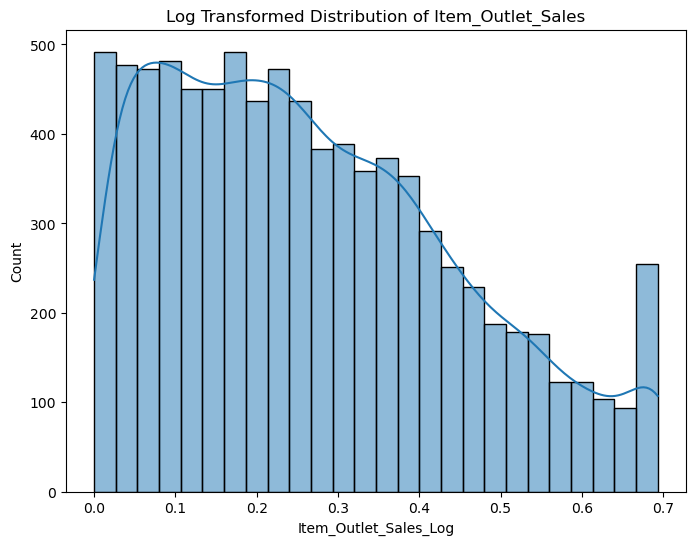

In [46]:
#Target Variable Transformation - Apply Log Transformation (if there are no zeros)
df_encoded['Item_Outlet_Sales_Log'] = np.log1p(df_encoded['Item_Outlet_Sales'])  # log1p handles zero values safely

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Item_Outlet_Sales_Log'], kde=True)
#sns.histplot(df_encoded['Item_Visibility_Log'], kde=True)
plt.title('Log Transformed Distribution of Item_Outlet_Sales')
plt.show()

In [47]:
#printing the datatype of an Each Column
df_encoded.dtypes

Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Househol                 float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drink               float64
Item_Type_Starchy Foods            float64
Outlet_Location_Type_Tier 1        float64
Outlet_Location_Type_Tier 2        float64
Outlet_Location_Type_Tier 3        float64
Outlet_Type_Grocery Store          float64
Outlet_Type_Supermarket Type1      float64
Outlet_Type

In [48]:
df_encoded.shape

(8523, 39)

In [49]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr,Item_Outlet_Sales_Log
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.927507,9,0.583333,0.577129,25,0.828359,0.970675,1.747351,0.910548,0.455606
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072068,3,1.000000,0.063941,15,1.625269,0.908058,1.488936,1.018381,0.061980
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.468288,9,0.583333,0.321781,25,1.104972,0.956861,0.010040,0.049235,0.278980
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.640093,0,0.541667,0.108990,26,1.505785,1.281683,0.660011,0.849053,0.103450
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095805,1,0.083333,0.149887,37,0.915595,1.281683,1.399138,0.695332,0.139664


### 3.7 Saving the Preprocessed Dataset

In [50]:
# Save the cleaned dataset
df_encoded.to_csv('processed_train1.csv', index=False)

### 3.8 Loading Preprocessed Data

In [51]:
#reloading the processed data into df
df=pd.read_csv("processed_train1.csv")

## 4) Model Training

In [52]:
# Split the dataset into features and target
x=df.drop(['Item_Outlet_Sales',"Item_Outlet_Sales_Log"],axis=1)
y=df['Item_Outlet_Sales']
y.head()

0    0.577129
1    0.063941
2    0.321781
3    0.108990
4    0.149887
Name: Item_Outlet_Sales, dtype: float64

### 4.1 Preparing the Training and Testing set

In [53]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.head(2)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr
549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.294433,0.180426,0.594464,9,0.583333,25,0.781205,0.599370,0.487386,0.120093
7757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800536,0.243294,0.591057,7,0.708333,22,1.222858,0.361622,0.474498,0.540680


In [55]:
y_train.head(2)

549     0.366830
7757    0.478726
Name: Item_Outlet_Sales, dtype: float64

In [56]:
print(len(x_train),len(y_train))

6818 6818


In [57]:
print(len(x_test),len(y_test))

1705 1705


### 4.2 Base Modeling

In [58]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [59]:
#get feature importance and select top features
importances=rf.feature_importances_

# Select the top features
num_features = min(10, len(importances))  # Get the top 10 or fewer if there are less
important_features = x.columns[np.argsort(importances)[-num_features:]]


In [60]:
# Reducing X to only important features
x_train_important = x_train[important_features]
x_test_important = x_test[important_features]

In [61]:
print(x_train.shape,x_train_important.shape)

(6818, 37) (6818, 10)


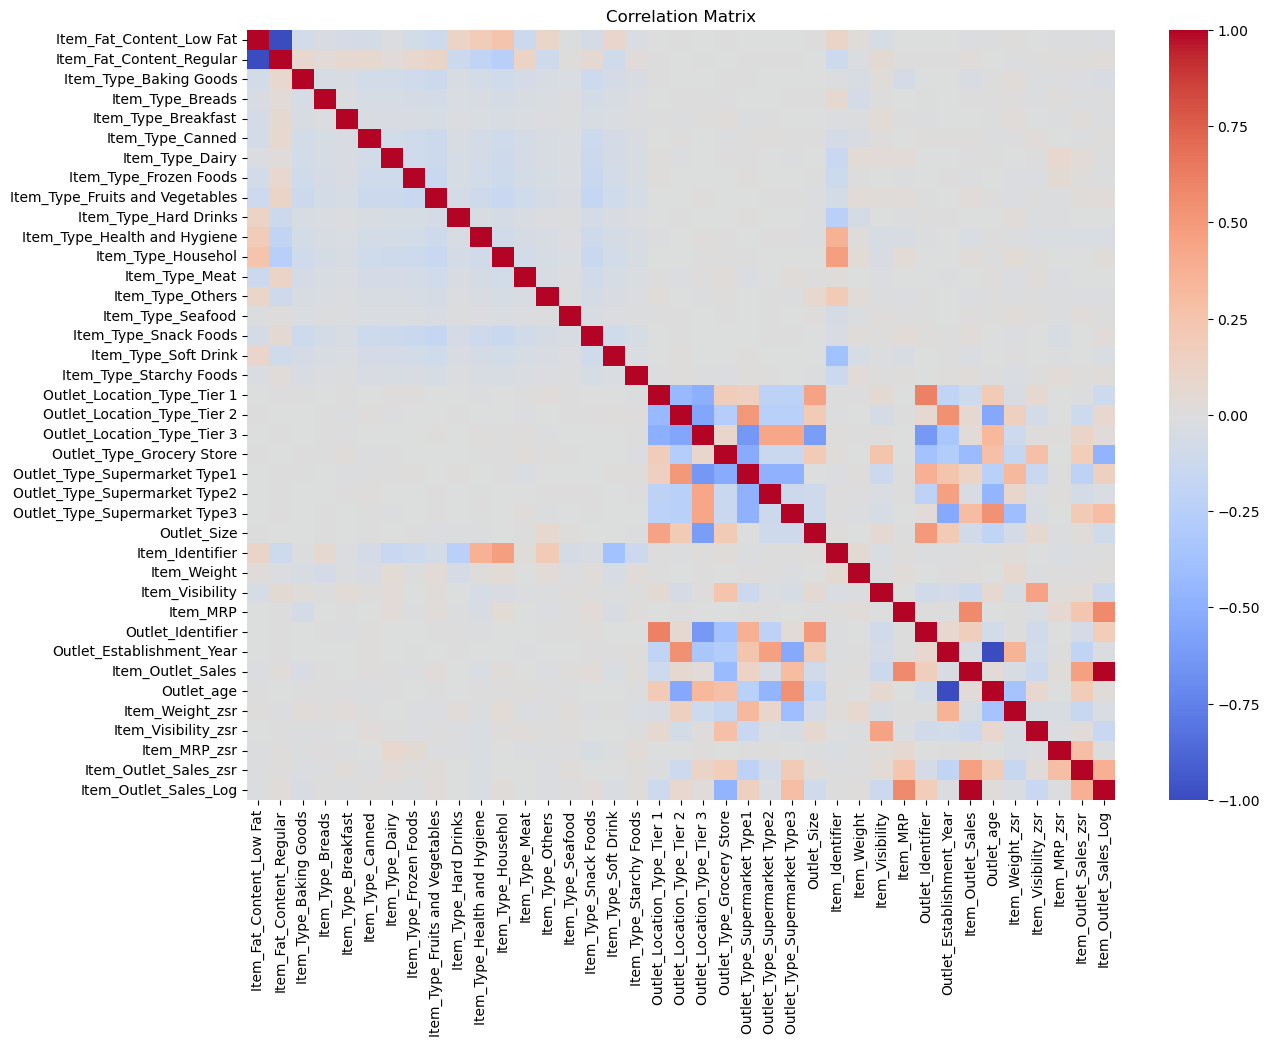

In [62]:
# Plot the correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 4.3 Checking For Best Model Performance

In [63]:
# Initialize simpler models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(max_depth=5, min_samples_split=2, n_estimators=100),
    'MLP ' : MLPRegressor(hidden_layer_sizes=(100), max_iter=300),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
}

#Function to evaluate model using cross -validation
def evaluate_models(models,x,y):
    results={}
    for name, model in models.items():
        # perform 5- fold cross-validation
        cv_scores=cross_val_score(model,x,y,cv=5,scoring='r2')
        results[name]={
            "Mean R2" :cv_scores.mean(),
            "Standard Deviation" : cv_scores.std()
        }
    return results

# Evaluate all models on the important features
model_results = evaluate_models(models, x_train_important, y_train)

# Display results
for model, metrics in model_results.items():
    print(f"{model}: Mean R2 = {metrics['Mean R2']:.4f}, Standard Deviation = {metrics['Standard Deviation']:.4f}")

# Choose the best model based on the highest mean R² score
best_model_name = max(model_results, key=lambda x: model_results[x]["Mean R2"])
print(f"\nBest Model: {best_model_name}")

Linear Regression: Mean R2 = 0.7272, Standard Deviation = 0.0136
Random Forest: Mean R2 = 0.8476, Standard Deviation = 0.0082
MLP : Mean R2 = 0.6888, Standard Deviation = 0.0381
XGBoost: Mean R2 = 0.8465, Standard Deviation = 0.0096

Best Model: Random Forest


### 4.4 Hyper Tunning Parameter

In [64]:
# Define the parameter distribution for RandomForestRegressor
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 10],   # Maximum tree depth
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples at a leaf node
   
}
    
# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=10,                # Number of random combinations to try
    scoring='r2',
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all available processors
    random_state=42,           # Ensures reproducible results
    verbose=True,
    refit=True
    
)

# Fit the model to the training data
random_search.fit(x_train_important, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=True)

In [65]:
# Output the best parameters and best score
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

In [66]:
# Evaluate the best  Random Forest  model on the test set
y_pred_best_rf = best_rf_model.predict(x_test_important)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Output the results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (Best Random Forest):", mse_best_rf)
print("R² Score (Best Random Forest):", r2_best_rf)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Mean Squared Error (Best Random Forest): 0.008067005764450118
R² Score (Best Random Forest): 0.8669769534084206


### 4.5 Training Model with HyperParameters

In [67]:
best_rf=RandomForestRegressor(n_estimators=200,random_state=42,min_samples_split=10, max_depth=10,min_samples_leaf=2)
best_rf.fit(x_train_important,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [68]:
# Evaluate the best Random Forest model on the test set
y_pred_best_rf1 = best_rf.predict(x_test_important)
mse_best_rf1 = mean_squared_error(y_test, y_pred_best_rf1)
r2_best_rf1 = r2_score(y_test, y_pred_best_rf1)

# Output the results
print("For Testing Set")
print("Mean Squared Error (Best Random Forest):", mse_best_rf1)
print("R² Score (Best Random Forest):", r2_best_rf1)

For Testing Set
Mean Squared Error (Best Random Forest): 0.008067005764450118
R² Score (Best Random Forest): 0.8669769534084206


### 4.6  Saving the Model

In [69]:
import pickle
# Save the model to a file
with open('Random Forest.pkl', 'wb') as file:
    pickle.dump(best_rf, file)